# Lab 2: Titanic Dataset Analysis: Data - Inspect, Explore, Split 
**Author:** Mhamed  
**Date:** 03, 21, 2025 
 
**Objective:** The objective of this project is to perform a comprehensive analysis of the Titanic dataset with the goal of building a predictive model for passenger survival.


## Introduction
This project analyzes the Titanic dataset to predict passenger survival based on various features. It involves importing and inspecting the data, performing exploratory data analysis, cleaning the data, engineering new features, and selecting relevant input features for modeling. The project also explores methods for splitting the data into training and testing sets to evaluate the performance of a machine learning model.

## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.  

In [2]:
# This is a Python cell
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Import the necessary function
from pandas.plotting import scatter_matrix

In [3]:
# Section 1. Import and Inspect the Data
# 1.1 Load the dataset and display the first 10 rows

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Show the first 10 rows
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [4]:
# Python
# Check data types and missing values

print("Data Info:")
df.info()


# Summary statistics
print("Summary Statistics:")
df.describe()
print(df.describe())


# Check for missing values in each column
print("Missing values:")
df.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Summary Statistics:
         survived      pclass         age       

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Check for correlations useing the corr() method

print("\nCorrelation Matrix (numeric features only):")
print(df.corr(numeric_only=True))


Correlation Matrix (numeric features only):
            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone   

In [6]:
# Display the Minimun, median and max age
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

## Reflection 1
1) How many data instances are there? 891 rows
2) How many features are there? 15 features (columns)
3) What are the names? survived, pclass sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
4) Are there any missing values? Yes age (177), embarked (2), embark_town (2), deck (688).
5) Are there any non-numeric features? Yes sex, embarked, class, who, embark_town, alive
6) Are the data instances sorted on any of the attributes? No
7) What are the units of age? Years
8) What are the minimum, median and max age? Min is 0.42, median is 28, and max is 80
9) What two different features have the highest correlation? Parch and Sibsp at 0.414838
10) Are there any categorical features that might be useful for prediction? Sex might be useful feature

## Section 2. Data Exploration and Preparation
Now we need to explore our dataset with charts 

2.1 Explore Data Patterns and Distributions
Create a scatter matrix.
Since Titanic contains both numeric and categorical variables, we'll use only numeric values here.

Important:  Use only numeric attributes for the scatter matrix. If you want to explore categorical data, use count plots and bar plots instead.

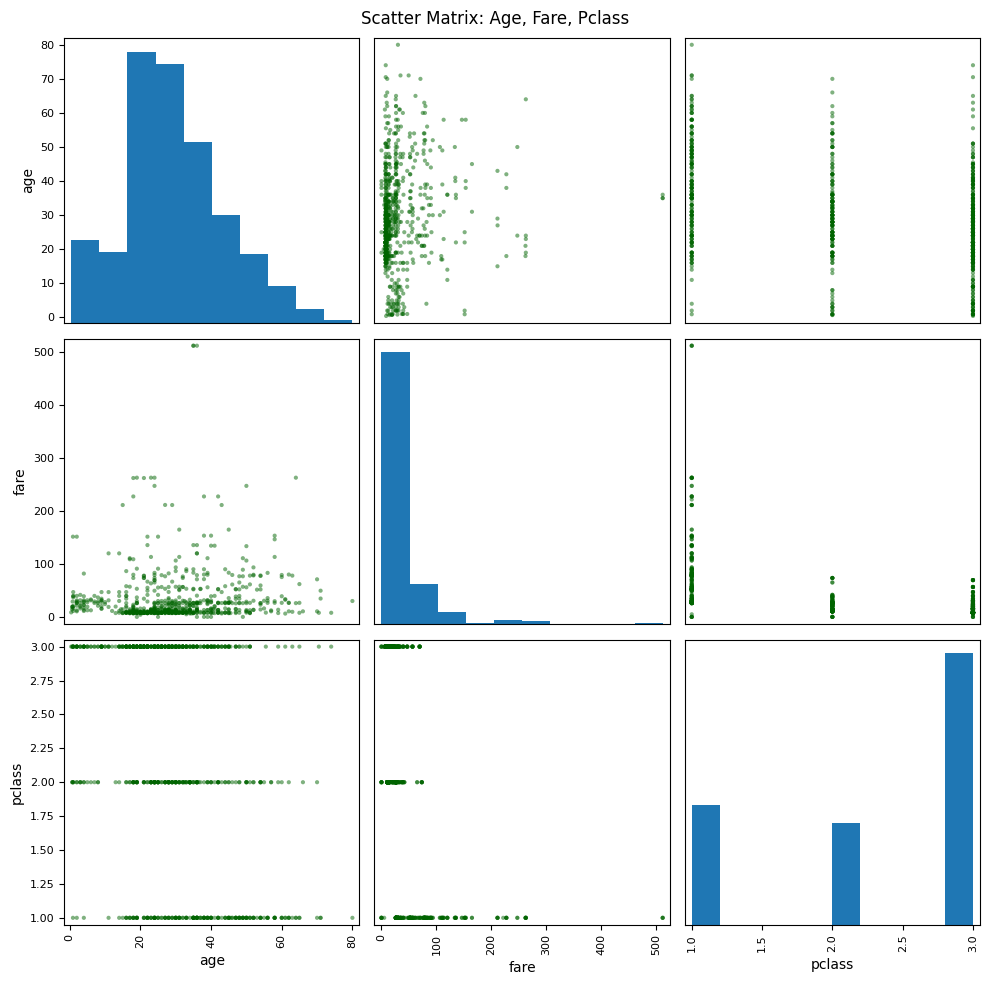

In [7]:
# Select only numeric features
attributes = ['age', 'fare', 'pclass']
# Create scatter matrix
scatter_matrix(df[attributes], figsize=(10, 10), color='darkgreen')

# Title
plt.suptitle("Scatter Matrix: Age, Fare, Pclass")
# Show the plot
plt.tight_layout()
plt.show()

    2.1.1 Create a scatter plot of age vs fare, colored by gender

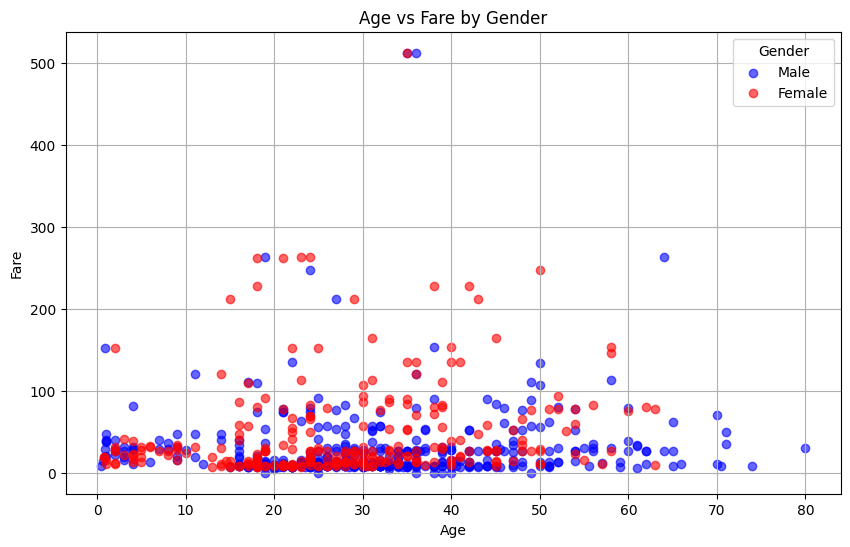

In [8]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot for males (0)
male_data = df[df['sex'] == 'male']
plt.scatter(
    male_data['age'], 
    male_data['fare'], 
    c='blue', 
    label='Male', 
    alpha=0.6
)

# Plot for females (1)
female_data = df[df['sex'] == 'female']
plt.scatter(
    female_data['age'], 
    female_data['fare'], 
    c='red', 
    label='Female', 
    alpha=0.6
)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')

# Add a legend
plt.legend(title="Gender")

# Add grid
plt.grid(True)

# Show the plot
plt.show()

    2.1.2 Create a histogram of age "Age Distribution"

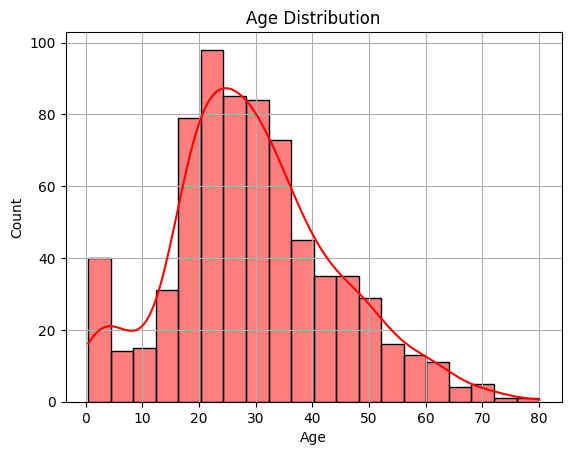

In [9]:
# Histogram of Age
# Plot histogram with KDE (Kernel Density Estimate)
sns.histplot(df['age'], kde=True, color='red')

# Add title and display
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

2.1.3 Create a count plot for class and survival

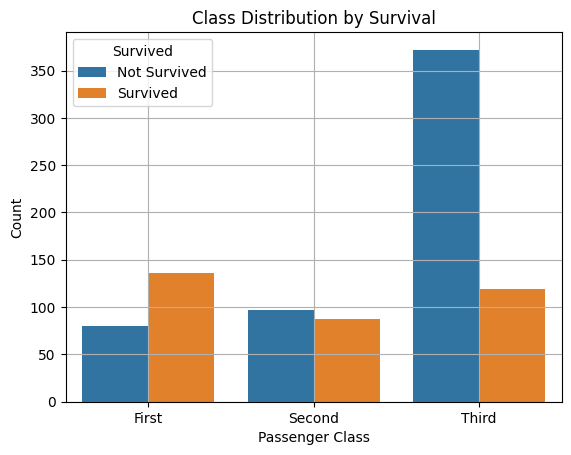

In [10]:
# Count Plot - Class Distribution by Survival
# Count plot: Passenger class with survival hue
sns.countplot(x='class', hue='survived', data=df)

# Add title and display
plt.title('Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.grid(True)
plt.show()

Reflection 2.1:

* What patterns or anomalies do you notice?
    - First-class passengers pay higher fares, while third-class passengers pay lower fares.
    - Age Distribution: The distribution skews toward younger passengers, possibly indicating more children or young adults.
    - Age has 177 missing values and deck has 688 missing values.
    - Third-class passengers dominate the dataset, with lower survival rates

* Do any features stand out as potential predictors?
    - Class: Strongly correlated with fare and survival, with survival rates varying across classes.
    - Sex: Women had a higher survival rate, making it an important predictor.

* Are there any visible class imbalances?
    - There is a clear imbalance between the survival rates in different classes, with third-class passengers having a significantly lower survival rate compared to those in first or second class.    

2.2 Handle Missing Values and Clean Data

In [11]:
# Fill missing values in 'age' with the median age
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing values in 'embark_town' with the most frequent value (mode)
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

2.3 Feature Engineering

In [12]:
# 1. Create a new feature: Family size
df['family_size'] = df['sibsp'] + df['parch'] + 1

# 2. Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 3. Create a binary feature for 'alone':
df['alone'] = df['alone'].astype(int)

# Print outcome
print(df[['sex', 'embarked', 'family_size', 'alone']].head())

   sex  embarked  family_size  alone
0    0       2.0            2      0
1    1       0.0            2      0
2    1       2.0            1      1
3    1       2.0            2      0
4    0       2.0            1      1


Reflection 2.3

- Why might family size be a useful feature for predicting survival? Family size could influence Titanic survival chances, as people traveling with family might have had a better chance of survival because family groups were more likely to stay together.

- Why convert categorical data to numeric? Converting categorical data to numeric format is a common step in preparing data for machine learning algorithms. The sex and embarked columns are transformed into numerical values so they can be directly used in predictive models.

## Section 3. Feature Selection and Justification

### 3.1 Feature Selection and Target Variable

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)

For classification, we’ll use survived as the target variable.

Input features: age, fare, pclass, sex, family_size
Target: survived

### 3.2 Define X and y

- Assign input features to X
- Assign target variable to y (as applicable)

In [13]:
X = df[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = df['survived']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (891, 5)
y shape: (891,)


### Reflection 3:

- Why are these features selected? Theses selected features are chosen for their relevance in predicting Titanic survival
- Are there any features that are likely to be highly predictive of survival? Yes, certain features are more predictive of survival, such as sex, pclass, and family_size.

## Section 4. Splitting

In [14]:
## Section 4. Train a Linear Regression Model
# Section 4.1: Basic Train/Test Split

from sklearn.model_selection import train_test_split

X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(
    X, y, test_size=0.2, random_state=123
)


# Show set sizes
print('Train size:', len(X_train_b))
print('Test size:', len(X_test_b))


# Section 4.2: Stratified Train/Test Split
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_index, test_index in splitter.split(X, y):
    X_train_strat = X.iloc[train_index]
    y_train_strat = y.iloc[train_index]
    X_test_strat = X.iloc[test_index]
    y_test_strat = y.iloc[test_index]

print("Stratified Split → Train size:", len(X_train_strat), " | Test size:", len(X_test_strat))


# Section 4.3: Compare Class Distributions
print("\nOriginal Class Distribution:\n", y.value_counts(normalize=True))
print("\nBasic Split - Train Set Class Distribution:\n", y_train_basic.value_counts(normalize=True))
print("\nBasic Split - Test Set Class Distribution:\n", y_test_basic.value_counts(normalize=True))
print("\nStratified Split - Train Set Class Distribution:\n", y_train_strat.value_counts(normalize=True))
print("\nStratified Split - Test Set Class Distribution:\n", y_test_strat.value_counts(normalize=True))

NameError: name 'X_train_b' is not defined

## Reflection 4:

1. Why might stratification improve model performance? Stratification improves model performance by ensuring that the class distributions in both the training and test sets are more representative of the overall dataset.

2. How close are the training and test distributions to the original dataset? Based on the outputs, both split methods produce train/test distributions are close to the original dataset. However, stratification maintains a more accurate balance, especially in the test set, where the distribution more closely mirrors the original class proportions.
    
3. Which split method produced better class balance? The stratified split method maintained a class distribution closer to the original dataset, offering a more accurate representation in both the training and test sets.